In [57]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [58]:
import librosa
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, fnmatch

In [59]:
aud_file_path = 'UrbanSound8K/audio/fold1/17592-5-0-0.wav'
librosa_aud_data, librosa_sample_rate = librosa.load(aud_file_path)

In [60]:
print(librosa_aud_data)

[ 0.01760817  0.03120002  0.02623309 ... -0.11952433 -0.11388926
 -0.12300572]


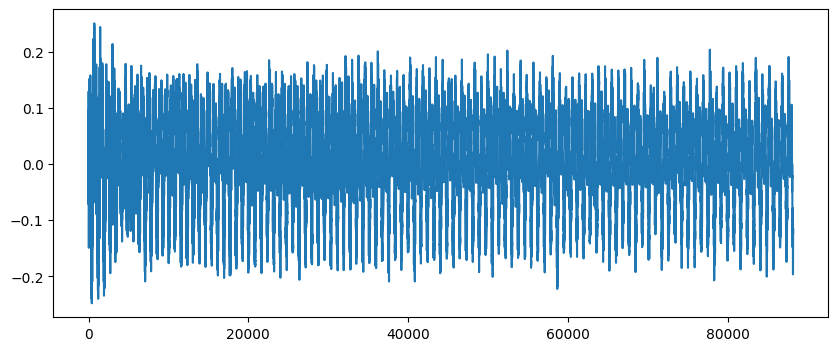

In [61]:
plt.figure(figsize=(10,4))
plt.plot(librosa_aud_data)
plt.show()

In [62]:
librosa_sample_rate

22050

In [63]:
mfccs = librosa.feature.mfcc(y=librosa_aud_data, sr = librosa_sample_rate, n_mfcc = 45)
mfccs, mfccs.shape

(array([[-136.75691   , -107.1844    , -114.638016  , ..., -236.31557   ,
         -217.6784    , -203.16145   ],
        [  91.54838   ,   98.79574   ,  107.72663   , ...,  130.14984   ,
          132.33365   ,  126.62271   ],
        [ -19.923548  ,  -27.22229   ,  -29.451797  , ...,   -8.786186  ,
           -7.136146  ,   15.213332  ],
        ...,
        [  -3.162879  ,   -6.548587  ,   -5.195045  , ...,   -1.3127902 ,
           -4.7380953 ,   -1.1433192 ],
        [   4.6088896 ,    2.9938588 ,    0.60501117, ...,    0.8770453 ,
           -2.3744025 ,   -2.1057782 ],
        [  -7.3845654 ,   -6.5048738 ,   -4.5429964 , ...,   -4.8777485 ,
           -7.1957903 ,   -4.5698223 ]], dtype=float32),
 (45, 173))

In [64]:
def feature_extractor(file_name):
    aud, samp_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y = aud, sr = samp_rate, n_mfcc = 45)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
    return mfccs_scaled_features

In [65]:
def find_files(directory, pattern):
    for root, dirs, files in os.walk(directory):
        for basename in files:
            if fnmatch.fnmatch(basename, pattern):
                filename = os.path.join(root, basename)
                yield filename

dataset = []

for filename in find_files('UrbanSound8K/audio/', '*.wav'):
    label = filename.split('.wav')[0][-5]
    if label == '-':
        label = filename.split('.wav')[0][-6]
    dataset.append({'filename' : filename, 'label' : label})


dataset

[{'filename': 'UrbanSound8K/audio/fold5/17578-5-0-7.wav', 'label': '5'},
 {'filename': 'UrbanSound8K/audio/fold5/23219-5-1-1.wav', 'label': '5'},
 {'filename': 'UrbanSound8K/audio/fold5/121286-0-0-15.wav', 'label': '0'},
 {'filename': 'UrbanSound8K/audio/fold5/156634-5-2-7.wav', 'label': '5'},
 {'filename': 'UrbanSound8K/audio/fold5/23219-5-0-10.wav', 'label': '5'},
 {'filename': 'UrbanSound8K/audio/fold5/162318-2-0-38.wav', 'label': '2'},
 {'filename': 'UrbanSound8K/audio/fold5/72259-1-5-3.wav', 'label': '1'},
 {'filename': 'UrbanSound8K/audio/fold5/104998-7-17-1.wav', 'label': '7'},
 {'filename': 'UrbanSound8K/audio/fold5/178260-7-1-4.wav', 'label': '7'},
 {'filename': 'UrbanSound8K/audio/fold5/159701-6-3-0.wav', 'label': '6'},
 {'filename': 'UrbanSound8K/audio/fold5/111671-8-0-4.wav', 'label': '8'},
 {'filename': 'UrbanSound8K/audio/fold5/104998-7-14-1.wav', 'label': '7'},
 {'filename': 'UrbanSound8K/audio/fold5/180128-4-14-0.wav', 'label': '4'},
 {'filename': 'UrbanSound8K/audio/fo

In [66]:
df = pd.DataFrame(dataset)
df.head()

,filename,label
0,UrbanSound8K/audio/fold5/17578-5-0-7.wav,5
1,UrbanSound8K/audio/fold5/23219-5-1-1.wav,5
2,UrbanSound8K/audio/fold5/121286-0-0-15.wav,0
3,UrbanSound8K/audio/fold5/156634-5-2-7.wav,5
4,UrbanSound8K/audio/fold5/23219-5-0-10.wav,5


In [67]:
df.shape

(8732, 2)

In [68]:
extracted_features = []
df['data'] = df['filename'].apply(feature_extractor)

/home/jeswin/dl_cuda/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
/home/jeswin/dl_cuda/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
/home/jeswin/dl_cuda/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(


In [69]:
df.head()

,filename,label,data
0,UrbanSound8K/audio/fold5/17578-5-0-7.wav,5,"[-62.324627, 86.403496, 20.670639, 50.45617, -..."
1,UrbanSound8K/audio/fold5/23219-5-1-1.wav,5,"[-320.7133, 57.21779, -5.198266, 15.799144, -1..."
2,UrbanSound8K/audio/fold5/121286-0-0-15.wav,0,"[-96.867615, 147.89238, -44.75019, 3.7823706, ..."
3,UrbanSound8K/audio/fold5/156634-5-2-7.wav,5,"[-368.1728, 125.42955, -4.4665875, 75.8946, -1..."
4,UrbanSound8K/audio/fold5/23219-5-0-10.wav,5,"[-340.21442, 67.597626, -5.819651, 24.368187, ..."


In [70]:
df = df.rename(columns={'label':'class'})
df = df.rename(columns={'data': 'feature'})

In [71]:
df = df.drop(['filename'], axis=1)

In [72]:
df.head()

,class,feature
0,5,"[-62.324627, 86.403496, 20.670639, 50.45617, -..."
1,5,"[-320.7133, 57.21779, -5.198266, 15.799144, -1..."
2,0,"[-96.867615, 147.89238, -44.75019, 3.7823706, ..."
3,5,"[-368.1728, 125.42955, -4.4665875, 75.8946, -1..."
4,5,"[-340.21442, 67.597626, -5.819651, 24.368187, ..."


In [73]:
x = np.array(df['feature'].tolist())
y = np.array(df['class'].tolist())

In [74]:
x.shape

(8732, 45)

In [75]:
class_enc = LabelEncoder()
y = to_categorical(class_enc.fit_transform(y))
y[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =23)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6985, 45), (1747, 45), (6985, 10), (1747, 10))

In [77]:
num_labels = 10

In [78]:
model = Sequential()
model.add(tf.keras.layers.Input(shape=(45,)))
model.add(Dense(125))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(250))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(125))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [79]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 125)            │         5,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 125)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 125)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 250)            │        31,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 250)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 250)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 125)            │        31,375 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 125)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 125)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 69,885 (272.99 KB)

 Trainable params: 69,885 (272.99 KB)

 Non-trainable params: 0 (0.00 B)

In [80]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer = 'adam')

In [81]:
epoch = 100
batch = 32

model.fit(x_train, y_train, batch_size = batch, epochs = epoch, validation_data = (x_test, y_test), verbose = 1)

Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.1233 - loss: 16.2638 - val_accuracy: 0.1271 - val_loss: 2.2802
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1401 - loss: 2.5090 - val_accuracy: 0.1809 - val_loss: 2.2348
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1711 - loss: 2.2805 - val_accuracy: 0.2370 - val_loss: 2.1925
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1777 - loss: 2.2247 - val_accuracy: 0.2685 - val_loss: 2.0495
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2145 - loss: 2.1364 - val_accuracy: 0.2822 - val_loss: 2.0144
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2293 - loss: 2.0783 - val_accuracy: 0.2965 - val_loss: 1.9797
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2310 - loss: 2.0652 - val_accuracy: 0.3148 - val_loss: 1.9306
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2590 - loss: 1.9937 - val_ac

In [82]:
val_test_acc = model.evaluate(x_test, y_test, verbose = 0)
val_test_acc

[0.6764188408851624, 0.7882083654403687]

In [83]:
x_test[1]

array([-2.5867346e+02,  1.3180759e+02, -2.9710464e+01,  3.3088615e+01,
       -4.2251163e+00,  1.4522230e+01, -6.0831469e-01,  2.6116846e+01,
       -1.8087292e+01,  1.5883080e+01, -1.5253419e+00,  4.4890795e+00,
       -5.6619825e+00,  1.7359909e+01, -8.4794607e+00,  9.1782656e+00,
       -1.0923705e+01,  6.2008138e+00, -3.5586689e+00,  3.3775604e+00,
       -2.7810020e+00,  7.7614379e+00, -5.4368587e+00,  6.2560859e+00,
       -3.7972322e+00,  5.4178505e+00, -2.0526671e+00,  3.1857767e+00,
       -2.9850795e+00,  3.3393929e+00, -3.2712802e-01,  7.2833441e-02,
       -2.4789600e+00,  7.1534622e-01, -3.1027341e+00,  4.3352094e+00,
        7.0594215e-01, -4.9196692e+00, -5.3998132e+00, -4.9433509e-01,
       -1.5038774e+00, -3.9384303e+00, -1.6484693e-01, -3.5101500e-01,
       -5.9289770e+00], dtype=float32)

In [85]:
model.predict(x_test)

55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step  


array([[4.8420838e-01, 5.6106164e-03, 8.8954382e-02, ..., 1.2804666e-03,
        1.5883312e-02, 1.7377798e-01],
       [4.2717814e-02, 3.2332006e-01, 2.0004002e-02, ..., 7.5243190e-02,
        2.8254135e-02, 3.6013886e-01],
       [2.0993514e-09, 4.6443830e-07, 7.8511800e-07, ..., 3.3462779e-25,
        2.3990991e-05, 1.8267334e-05],
       ...,
       [9.9824631e-01, 5.7783313e-05, 3.7356360e-06, ..., 1.8633727e-04,
        3.2089014e-07, 6.5640413e-04],
       [3.0262922e-07, 2.3583035e-04, 7.5644788e-09, ..., 9.9890196e-01,
        3.5862584e-07, 5.6362192e-06],
       [7.6134713e-29, 2.8773574e-17, 1.2085568e-29, ..., 0.0000000e+00,
        2.9204990e-30, 2.7598180e-20]], dtype=float32)

In [86]:
new_file = "UrbanSound8K/dog_bark.wav"
sound_sig, sample_r = librosa.load(new_file, res_type='kaiser_fast')
mfccs_features_new = librosa.feature.mfcc(y=sound_sig, sr=sample_r, n_mfcc=45)
mfccs_features_scaled = np.mean(mfccs_features_new.T, axis=0)

In [87]:
mfccs_features_scaled

array([-2.3287889e+02,  1.6793970e+02, -2.0850985e+01, -1.5296498e+01,
       -1.8626949e+01,  8.7505703e+00, -3.4731619e+00,  6.5074215e+00,
       -1.8699450e+01,  6.9317927e+00, -2.3070762e+00,  2.0707052e+01,
       -4.2255034e+00,  1.4939916e+01,  1.3917811e+01,  8.9853163e+00,
       -4.9645848e+00,  1.2017354e+01, -4.5229235e+00,  2.3999052e+00,
       -2.4973316e+00, -3.0575874e+00, -4.8321471e+00,  6.5929198e+00,
        9.3002874e-01,  7.5066543e-01,  1.2378440e-01, -4.1880231e+00,
       -5.6206167e-01, -5.2079749e+00, -3.8518877e+00, -3.3311832e+00,
       -1.7310224e-01,  4.4501438e+00,  5.9929681e+00,  2.1802624e-01,
        2.3248036e+00, -4.4420261e+00, -5.5450101e+00, -4.4400520e+00,
       -1.2032349e+00, -2.8665793e+00, -3.5264811e-01, -3.2117329e+00,
       -2.6903474e+00], dtype=float32)

In [88]:
mfccs_features_scaled = mfccs_features_scaled.reshape(1,-1)
mfccs_features_scaled.shape

(1, 45)

In [89]:
result = model.predict(mfccs_features_scaled)
result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


array([[2.70682995e-05, 1.16900206e-04, 1.48759282e-04, 9.77759361e-01,
        1.07818832e-05, 4.21866986e-07, 1.05361911e-02, 1.90341991e-14,
        7.79596041e-04, 1.06209535e-02]], dtype=float32)

In [90]:
classes_names = ['air conditioner', 'car horn', 'children playing', 'dog bark', 'drilling', 'engine_idling', 'gun shot', 'jack hammer', 'siren', 'street music']

result_f = np.argmax(result[0])
classes_names[result_f]

'dog bark'